**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio 
from collections import defaultdict
import librosa

# Data Preparation

In [2]:
from scipy.signal import decimate

In [3]:
path = '../../ravdess/ravdess/03-01-01-01-01-01-01.wav'
ts, sr = librosa.load(path, sr=None)
print(ts.shape, sr)

(158558,) 48000


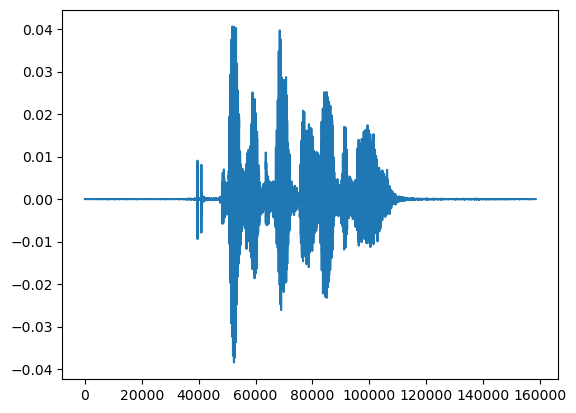

In [4]:
plt.plot(ts)
plt.show()

In [5]:
Audio(ts, rate=sr)

In [6]:
# isolate the word "kids"
Audio(ts[50000:58000], rate=sr)

In [7]:
# downsample the audio
q = 8
ts1 = decimate(ts[50000:58000], q=8)

In [8]:
Audio(ts1, rate=sr/q)

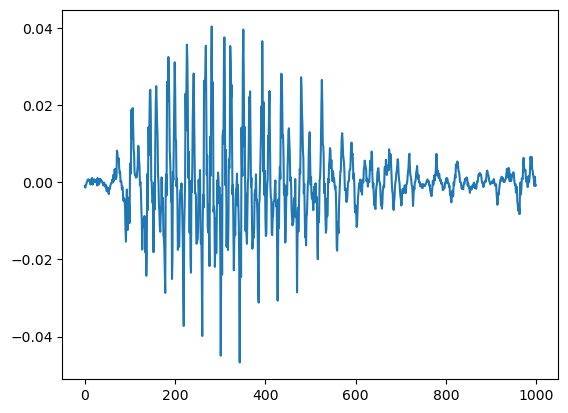

In [9]:
plt.plot(ts1)
plt.show()

In [10]:
path = '../../ravdess/ravdess/03-01-01-01-01-02-01.wav'
ts2, sr = librosa.load(path, sr=None)
print(ts.shape, sr)

(158558,) 48000


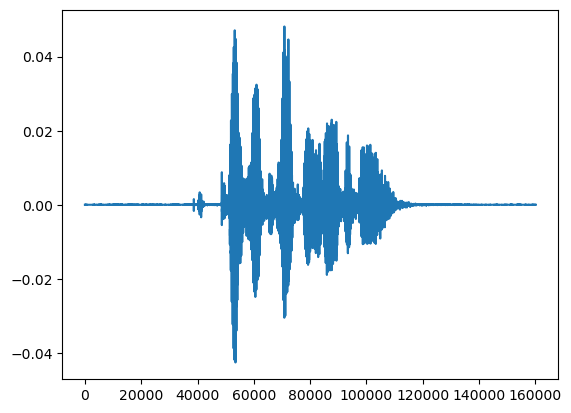

In [11]:
plt.plot(ts2)
plt.show()

In [12]:
Audio(ts2, rate=sr)

In [13]:
# isolate the word "kids"
Audio(ts2[50000:58000], rate=sr)

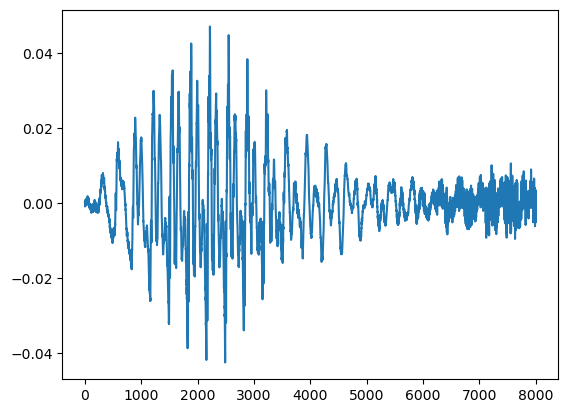

In [14]:
plt.plot(ts2[51000:59000])

In [15]:
# downsample the audio
q = 8
ts2 = decimate(ts2[51000:59000], q=8)

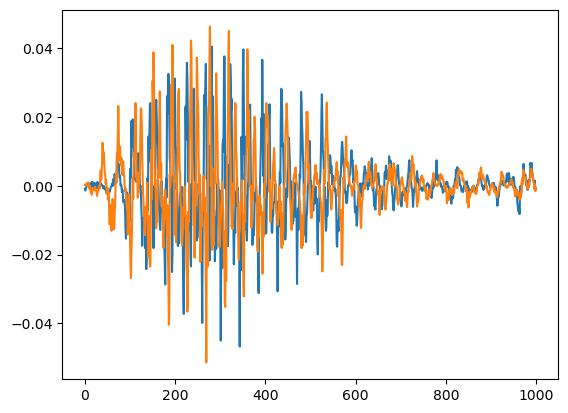

In [16]:
plt.plot(ts1)
plt.plot(ts2)
plt.show()

### What if time series are not so well aligned?

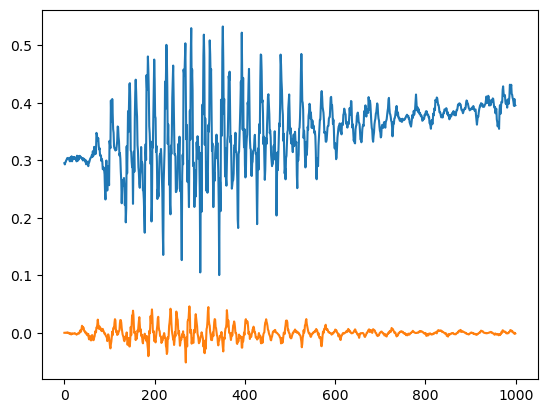

In [17]:
ts1 = pd.Series(ts1*5 + 0.3 + np.arange(len(ts1))*0.0001)
ts2 = pd.Series(ts2)
plt.plot(ts1)
plt.plot(ts2)
plt.show()

# Transformations

### Transformation I: Offset Translation

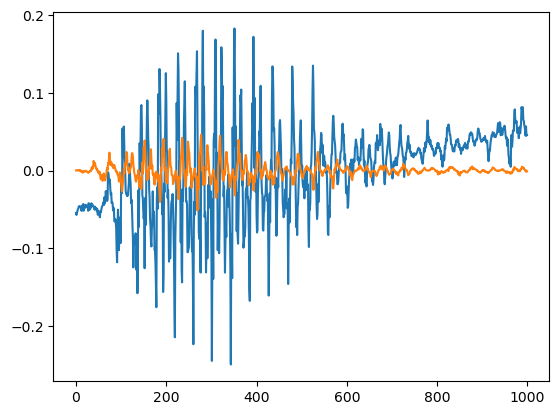

In [18]:
plt.plot(ts1 - ts1.mean())
plt.plot(ts2 - ts2.mean())
plt.show()

### Transformation II: Amplitude Scaling

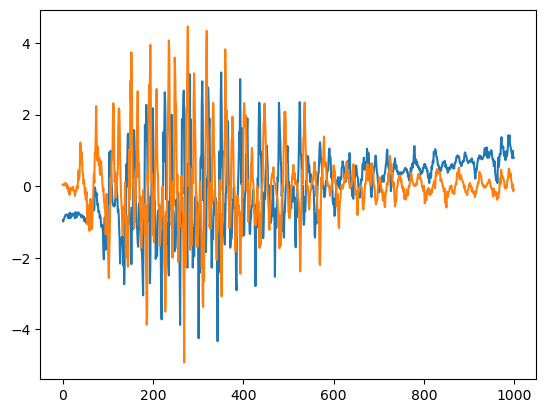

In [19]:
plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.show()

In [20]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

/Users/francesco/miniconda3/envs/ravdess/lib/python3.9/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


https://tslearn.readthedocs.io/en/latest/index.html

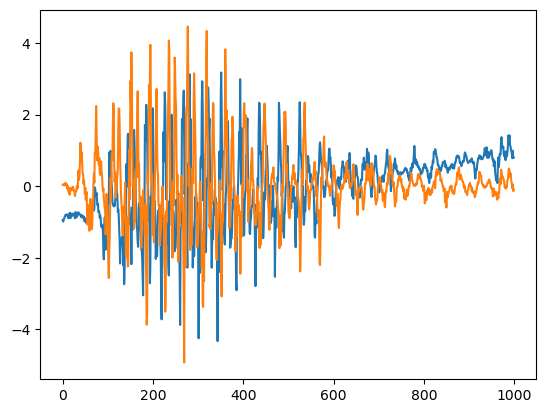

In [21]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1_scaled = scaler.fit_transform(ts1.values.reshape(1, -1)).flatten()
ts2_scaled = scaler.fit_transform(ts2.values.reshape(1, -1)).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

### Transformation III: Trend removal

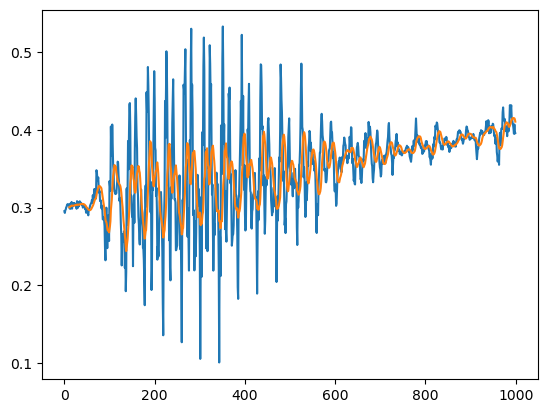

In [22]:
plt.plot(ts1)
plt.plot(ts1.rolling(window=12).mean())
plt.show()

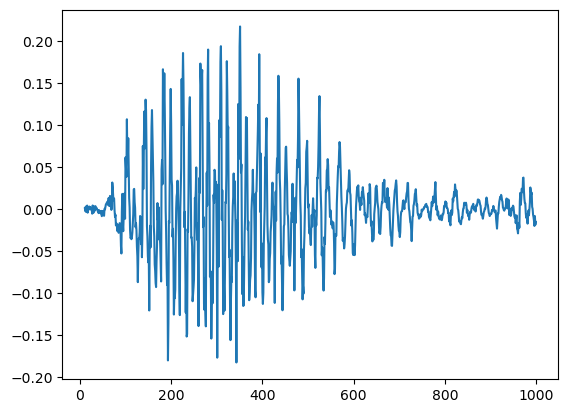

In [23]:
ts_shift = ts1 - ts1.rolling(window=12).mean()
plt.plot(ts_shift)
plt.show()

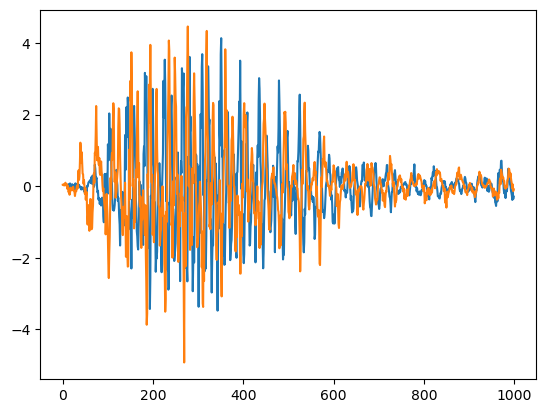

In [24]:
ts1_det = ts1 - ts1.rolling(window=12).mean()
plt.plot((ts1_det - ts1_det.mean())/ts1_det.std())
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.show()

### Transformation IV: Noise (smoothing)

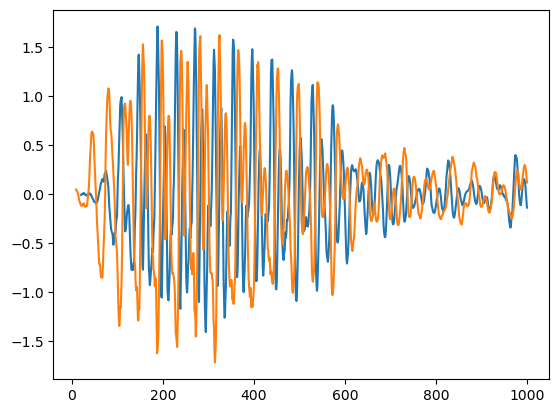

In [25]:
w = 10
ts1_det = ts1 - ts1.rolling(window=12).mean()
plt.plot(((ts1_det - ts1_det.mean())/ts1_det.std()).rolling(window=w).mean())
plt.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean())
plt.show()

In [26]:
ts1 = ((ts1_det - ts1_det.mean())/ts1_det.std()).rolling(window=w).mean().dropna()
ts2 = ((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean().dropna()[:-11]
ts1.shape, ts2.shape

((980,), (980,))